# Time Series: Forecasting Bitcoin price

In [1]:
# Importing TF and checking the version
import tensorflow as tf

print(tf.__version__)

2.10.1


### Importing time series with Pandas

In [2]:
# Reading Bitcoin data and parsing dates
import pandas as pd

df = pd.read_csv(
    "BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
    parse_dates=["Date"],
    index_col=["Date"]   
)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:
# Separating closing prices for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


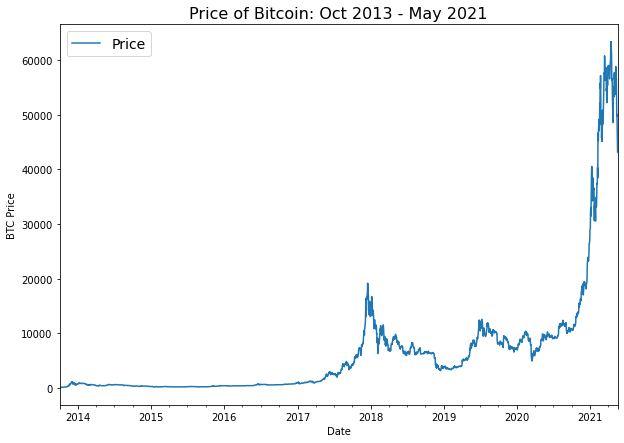

In [7]:
# Visualising Bitcoin prices
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin: Oct 2013 - May 2021", fontsize=16)
plt.legend(fontsize=14);

### Importing time series with Python

In [8]:
# Importing Bitcoin data with Python
import csv
from datetime import datetime

timestamps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader) # Skips first line to remove column names
    for line in csv_reader:
        timestamps.append(datetime.strptime(line[1], "%Y-%m-%d"))
        btc_price.append(float(line[2]))

# Viewing first 10 records
timestamps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin: Oct 2013 - May 2021')

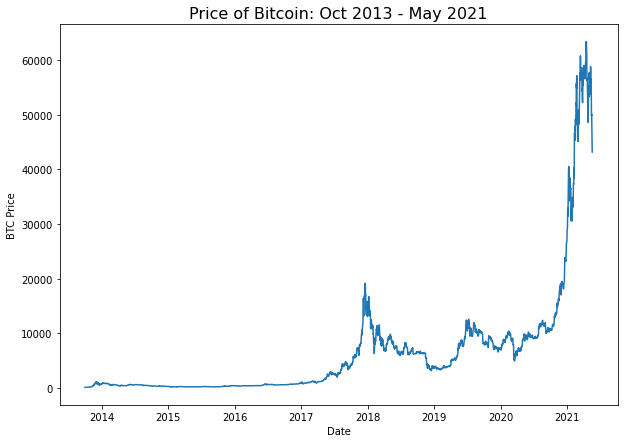

In [9]:
# Plotting from CSV
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timestamps, btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin: Oct 2013 - May 2021", fontsize=16)
#plt.legend();

### Creating train and test data

In [10]:
# Get Bitcoin date array
timestamps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timestamps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to create train / test split for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    timestamps, # dates
    prices, # BTC prices
    test_size=0.2,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

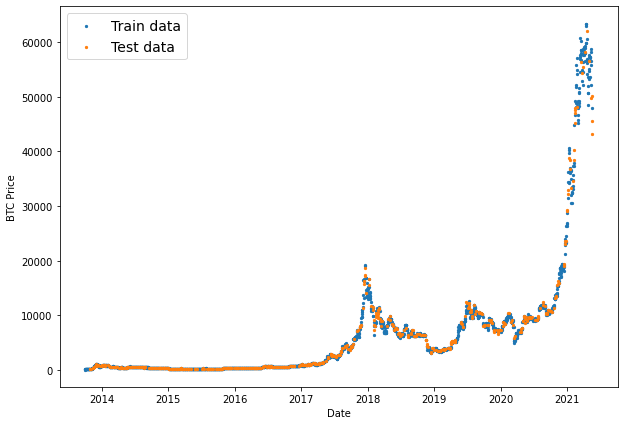

In [12]:
# Plotting the wrong data split results
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [13]:
# Right way to create train / test split for time series data
split_size = int(0.8 * len(prices)) # 80% - train, 20% - test

X_train, y_train = timestamps[:split_size], prices[:split_size]
X_test, y_test = timestamps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

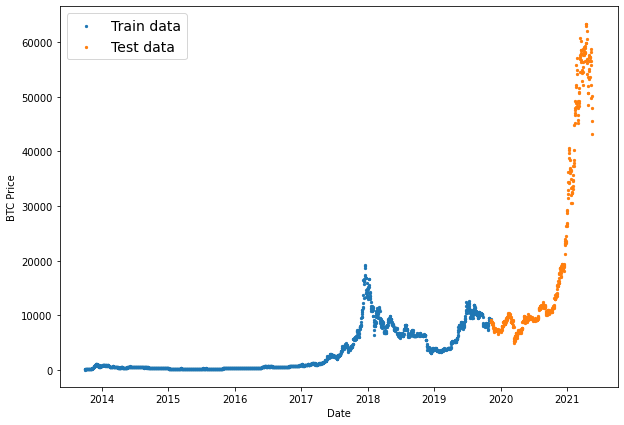

In [14]:
# Plotting the right data split results
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [15]:
# Creating plotting function
def plot_time_series(timestamps, values, marker=",", start=0, end=None, label=None):
    plt.plot(timestamps[start:end], values[start:end], marker=marker, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

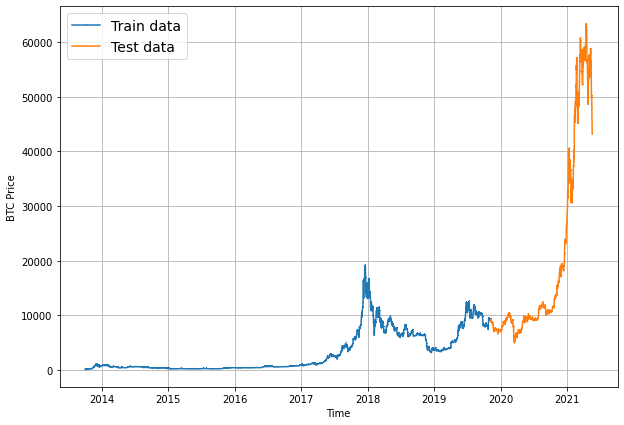

In [16]:
# Testing plot function
plt.figure(figsize=(10, 7))
plot_time_series(timestamps=X_train, values=y_train, label="Train data")
plot_time_series(timestamps=X_test, values=y_test, label="Test data")

### Model 0 - Naive forecast (baseline)

The prediction at timestamp t(y-hat) is equal to the value at timestamp t-1 (previous timestamp), i.e horizon of 1.
$$\hat{y}_{t} = y_{t-1}$$

In [17]:
# Creating naive forecast
naive_forecast = y_test[:-1]

print(f"First 10 values: {naive_forecast[:10]}\n")
print(f"Last 10 values: {naive_forecast[-10:]}")

First 10 values: [9226.48582088 8794.35864452 8798.04205463 9081.18687849 8711.53433917
 8760.89271814 8749.52059102 8656.97092235 8500.64355816 8469.2608989 ]

Last 10 values: [57107.12067189 58788.20967893 58102.19142623 55715.54665129
 56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361]


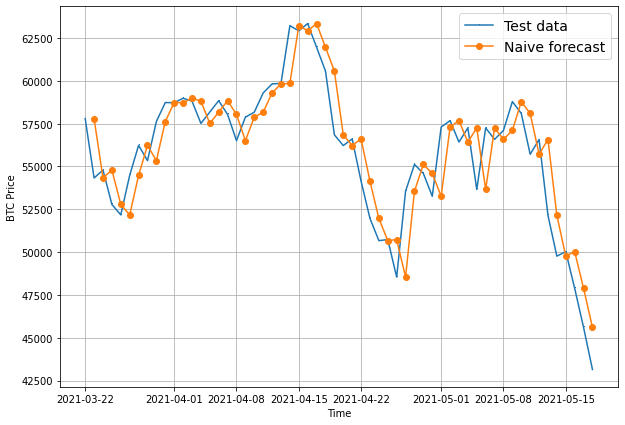

In [18]:
# Plotting naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timestamps=X_train, values=y_train, label="Train data")
plot_time_series(timestamps=X_test, values=y_test, start=500, label="Test data")
plot_time_series(timestamps=X_test[1:], values=naive_forecast, start=500, marker="o", label="Naive forecast")

In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of Naive Forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Seasonality of 1 day

    return mae / mae_naive_no_season

In [20]:
# Verify if MASE of Naive Forecast is 1
mean_absolute_scaled_error(
    y_true=y_test[1:],
    y_pred=naive_forecast
)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182626>

In [21]:
# Function for evaluation matrix
def evaluate_preds(y_true, y_pred):

    # Ensuring that we use float32 dtype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculating various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [22]:
# Evaluating naive forecast results
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

### Windowing data

In [23]:
# We want to use Bitcoin prices of the week to predict next day price
print(f"Intention is to use {btc_price[:7]} to predict {btc_price[7]}")

Intention is to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


In [24]:
# Setting up global variables for window size and horizon
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data

In [25]:
# Creating function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [26]:
# Testing window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8) + 1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [27]:
# Creating function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):

    # 1. Creating window of specific window size
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    # 2. Creating 2D array of multiple windows
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    # print(f"Windows indexes: {window_indexes} with shape of {window_indexes.shape}")

    # 3. Index on the target array (time series) with 2D of multiple window steps
    windowed_array = x[window_indexes]

    # 4. Get the labelled windows
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    return windows, labels

In [28]:
# Testing the function
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
# Viewing the first 3 windows / labels
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [30]:
# Viewing the last 3 windows / labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


### Splitting windows into training and testing sets

In [31]:
# Creating function to make train / test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = int(len(windows) * (1 - test_split)) # Default 80% train / 20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [32]:
# Creating training and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    full_windows, full_labels
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [33]:
# Checking the first 5 train window values
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [34]:
# Checking the first test values
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

### Modelling checkpoint callback

In [35]:
# Function to implement ModelCheckpoint callback
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True
    )

### Model 1 - Dense model (window = 7, horizon = 1)

In [36]:
# Loading libraries
import tensorflow as tf
from tensorflow.keras import layers

# Setting random seed
tf.random.set_seed(42)

# Constructing a model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# Compiling the model
model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

# Fitting the model
history_1 = model_1.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_1.name)]
)

Epoch 1/100
18/18 [==============================] - 5s 166ms/step - loss: 767.5490 - mae: 767.5490 - mse: 2282622.2500 - val_loss: 1619.1656 - val_mae: 1619.1656 - val_mse: 7740089.0000
Epoch 2/100
18/18 [==============================] - 2s 92ms/step - loss: 259.7924 - mae: 259.7924 - mse: 298587.8125 - val_loss: 1345.1830 - val_mae: 1345.1830 - val_mse: 5694588.0000
Epoch 3/100
18/18 [==============================] - 2s 88ms/step - loss: 211.2335 - mae: 211.2335 - mse: 219222.8125 - val_loss: 1087.2550 - val_mae: 1087.2550 - val_mse: 3813378.7500
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 188.6993 - mae: 188.6993 - mse: 188228.3906 - val_loss: 1147.1947 - val_mae: 1147.1947 - val_mse: 3861260.0000
Epoch 5/100
18/18 [==============================] - 2s 95ms/step - loss: 185.9763 - mae: 185.9763 - mse: 180402.9688 - val_loss: 1008.6976 - val_mae: 1008.6976 - val_mse: 3432733.5000
Epoch 6/100
18/18 [==============================] - 2s 98ms/step - loss:

In [37]:
# Evaluating the model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 565.7303 - mae: 565.7303 - mse: 1146877.2500


[565.7302856445312, 565.7302856445312, 1146877.25]

In [38]:
# Loading the best performing model_1 run and evaluating on test data
model_1_best = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 4ms/step - loss: 564.1600 - mae: 564.1600 - mse: 1144404.0000


[564.1599731445312, 564.1599731445312, 1144404.0]

In [39]:
# Creating function to make predictions
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # 1D array of predictions

In [40]:
# Making predictions with the model 1
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 4ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8815.79 , 8764.615, 9052.841, 8761.732, 8714.016, 8743.237,
        8650.741, 8509.642, 8443.472, 8523.386], dtype=float32)>)

In [41]:
# Evaluting model 1 predictions
model_1_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_1_preds
)
model_1_results

{'mae': 565.73035,
 'mse': 1146877.6,
 'rmse': 1070.9237,
 'mape': 2.5144274,
 'mase': 0.9938315}

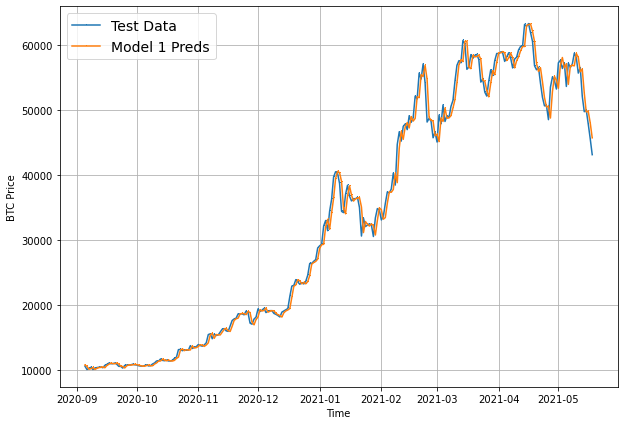

In [42]:
# Plotting model results
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, ],
    start=offset,
    label="Test Data"
)

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_1_preds,
    start=offset,
    label="Model 1 Preds"
)

### Model 2 - Dense model (window = 30, horizon = 1)

In [43]:
# Hyperparameters
HORIZON = 1
WINDOW_SIZE = 30

In [44]:
# Making windows data
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

(2757, 2757)

In [45]:
# Making train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [46]:
# Checking first 3 train windows
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [47]:
# Creating a model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

# Compiling the model
model_2.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fitting the model
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_2.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [48]:
# Evaluating model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 610.4095 - mae: 610.4095


[610.4094848632812, 610.4094848632812]

In [49]:
# Loading the best model 2
model_2_best = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 597.3901 - mae: 597.3901


[597.39013671875, 597.39013671875]

In [50]:
# getting model 2 predictions
model_2_preds = make_preds(
    model_2,
    input_data=test_windows
)

18/18 [==============================] - 0s 4ms/step


In [51]:
# Evaluating results
model_2_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_2_preds
)
model_2_results

{'mae': 610.40967,
 'mse': 1302889.4,
 'rmse': 1141.4418,
 'mape': 2.7248054,
 'mase': 1.067002}

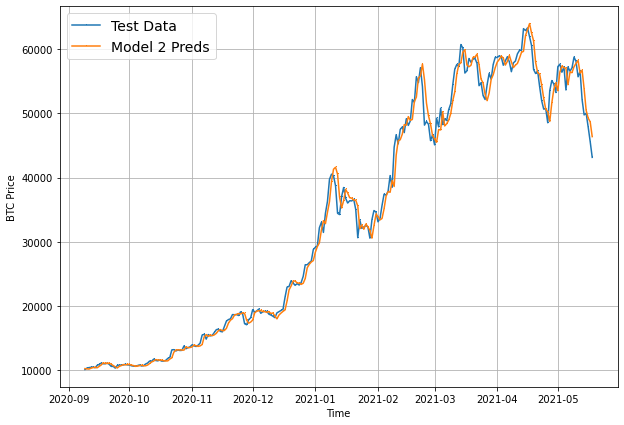

In [52]:
# Visualising model 2 results
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test Data"
)

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_2_preds,
    start=offset,
    label="Model 2 Preds"
)

### Model 3 - Dense model (window = 30, horizon = 7)

In [53]:
# Hyperparameters
HORIZON = 7
WINDOW_SIZE = 30

In [54]:
# Making windows data
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

(2751, 2751)

In [55]:
# Making train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [56]:
# Creating a model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

# Compiling the model
model_3.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fitting the model
history_3 = model_3.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_3.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [57]:
# Evaluating model 3
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1338.1931 - mae: 1338.1931


[1338.193115234375, 1338.193115234375]

In [58]:
# Making predictions with model 3
model_3_preds = make_preds(
    model_3,
    input_data=test_windows
)
model_3_preds[:3]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[8983.97 , 9119.223, 9264.036, 9245.741, 9094.924, 9217.397,
        9278.464],
       [8655.019, 8858.94 , 8989.122, 9011.275, 8770.795, 8770.505,
        9107.236],
       [8527.288, 8766.857, 8710.32 , 8700.974, 8796.712, 8655.544,
        8854.917]], dtype=float32)>

In [59]:
# Evaluating model 3 preds
model_3_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_3_preds
)
model_3_results

{'mae': array([ 378.75    ,  233.52023 ,  198.37695 ,  194.42313 ,  193.33914 ,
         254.07722 ,  249.65318 ,  333.95346 ,  418.2087  ,  512.3198  ,
         568.09717 ,  516.27185 ,  602.6803  ,  568.47217 ,  387.55002 ,
         213.65324 ,  252.98438 ,  443.5083  ,  464.58203 ,  518.3111  ,
         203.16385 ,  164.39746 ,  184.18596 ,  160.      ,  137.84877 ,
         190.11272 ,  229.12807 ,  278.83334 ,  208.86447 ,  155.85588 ,
         176.81291 ,  177.19113 ,  151.77058 ,  196.92766 ,  188.77748 ,
         215.4894  ,  226.2057  ,  257.59598 ,  224.58572 ,  353.68478 ,
         662.2264  ,  235.11418 ,  224.49574 ,  169.18324 ,  183.47572 ,
         120.794785,  141.66295 ,  122.459335,  110.67592 ,  238.37305 ,
         187.37193 ,  143.27428 ,  176.39641 ,  229.84578 ,  379.86508 ,
         482.5645  ,  716.56976 ,  739.6711  ,  721.809   ,  752.84094 ,
         611.71893 ,  409.43375 ,  347.56418 ,  592.1285  ,  628.2501  ,
         746.40295 ,  672.4586  ,  771.0414 

In [60]:
# Function for evaluation matrix
# MAKING IT WORK FOR HIGHER HORIZON
def evaluate_preds(y_true, y_pred):

    # Ensuring that we use float32 dtype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculating various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Account for different size metrics
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [61]:
# Re-evaluating model 3 preds
model_3_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_3_preds
)
model_3_results

{'mae': 1338.1931,
 'mse': 5740692.0,
 'rmse': 1514.7822,
 'mape': 5.9508533,
 'mase': 2.3812397}

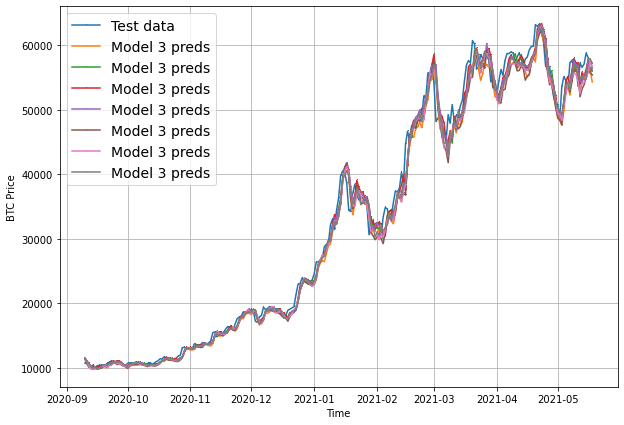

In [62]:
# Visualising the data
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test data"
)
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_3_preds,
    start=offset,
    label="Model 3 preds"
)

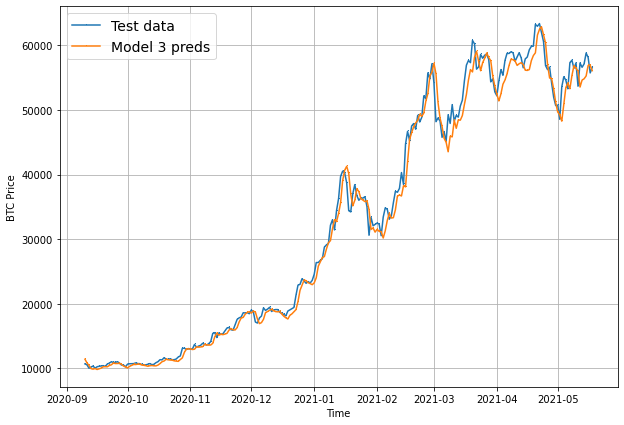

In [63]:
# Visualising the data
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test data"
)
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=tf.reduce_mean(model_3_preds, axis=1),
    start=offset,
    label="Model 3 preds"
)

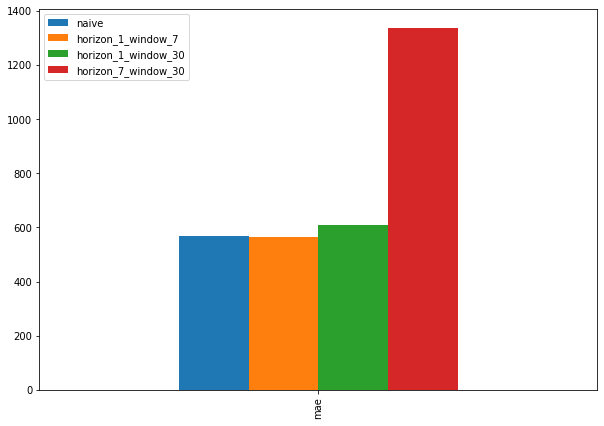

In [64]:
# Comparing models performance
pd.DataFrame({
    "naive": naive_results["mae"],
    "horizon_1_window_7": model_1_results["mae"],
    "horizon_1_window_30": model_2_results["mae"],
    "horizon_7_window_30": model_3_results["mae"]
}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4 - Using Conv1D

In [65]:
# Defining horizon and window
HORIZON = 1
WINDOW_SIZE = 7

In [66]:
# Creating windowed data
full_windows,full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [67]:
# Creating train / test datasets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [68]:
# Checking data input shape
train_windows[0].shape # returns WINDOW_SIZE

(7,)

In [69]:
# Conv1D expects input of (batch_size, timestamps, input_dim)

In [70]:
# Reshaping the tensor
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [71]:
# Creating Lambda layer
expand_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [72]:
# Testing Lambda layer
print(f"Original shape: {x.shape}") # Output WINDOW_SIZE
print(f"Expanded shape: {expand_dim_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dim_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [73]:
# Creating Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_Conv1D")

# Compiling the model
model_4.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_4 = model_4.fit(
    train_windows,
    train_labels,
    batch_size=128,
    epochs=100,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_4.name)]
)

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 977.9324  

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 95ms/step - loss: 964.8254 - val_loss: 2419.5188
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 276.8939

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 87ms/step - loss: 273.5331 - val_loss: 1039.9487
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 188.4723 - val_loss: 1040.5262
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 179.3205

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 96ms/step - loss: 179.1982 - val_loss: 970.7422
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 173.5273 - val_loss: 971.5415
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 131.4518

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 88ms/step - loss: 172.1825 - val_loss: 948.1760
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 213.1156

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 117ms/step - loss: 168.3035 - val_loss: 943.0971
Epoch 8/100
13/18 [====================>.........] - ETA: 0s - loss: 165.6748

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 95ms/step - loss: 164.7992 - val_loss: 910.4819
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 164.5318 - val_loss: 934.4742
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 157.9760

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 92ms/step - loss: 160.0402 - val_loss: 879.1314
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 173.6471

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 72ms/step - loss: 156.7031 - val_loss: 862.2402
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 153.7284 - val_loss: 940.0017
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 152.8095 - val_loss: 872.8124
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 147.7067

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 89ms/step - loss: 147.7067 - val_loss: 855.6138
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 142.6138

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 127ms/step - loss: 145.8070 - val_loss: 823.7041
Epoch 16/100
12/18 [===================>..........] - ETA: 0s - loss: 139.4053

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 127ms/step - loss: 141.7263 - val_loss: 807.6389
Epoch 17/100
18/18 [==============================] - 0s 21ms/step - loss: 139.3194 - val_loss: 820.5472
Epoch 18/100
11/18 [=================>............] - ETA: 0s - loss: 146.8414

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 75ms/step - loss: 138.8502 - val_loss: 779.5781
Epoch 19/100
10/18 [===============>..............] - ETA: 0s - loss: 130.3924

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 129ms/step - loss: 133.8554 - val_loss: 755.4291
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 136.4421

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 127ms/step - loss: 136.7386 - val_loss: 727.7441
Epoch 21/100
10/18 [===============>..............] - ETA: 0s - loss: 142.6160

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 146ms/step - loss: 135.8143 - val_loss: 713.7392
Epoch 22/100
11/18 [=================>............] - ETA: 0s - loss: 143.5296

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 120ms/step - loss: 131.3452 - val_loss: 703.3268
Epoch 23/100
11/18 [=================>............] - ETA: 0s - loss: 123.7559

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 121ms/step - loss: 127.0284 - val_loss: 693.8290
Epoch 24/100
13/18 [====================>.........] - ETA: 0s - loss: 126.2349

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 126ms/step - loss: 126.1279 - val_loss: 681.8528
Epoch 25/100
 9/18 [==============>...............] - ETA: 0s - loss: 130.7602

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 121ms/step - loss: 124.4712 - val_loss: 675.8945
Epoch 26/100
11/18 [=================>............] - ETA: 0s - loss: 125.0436

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 122ms/step - loss: 125.6733 - val_loss: 675.0190
Epoch 27/100
13/18 [====================>.........] - ETA: 0s - loss: 128.2973

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 140ms/step - loss: 124.9943 - val_loss: 656.8731
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 120.2951

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 135ms/step - loss: 120.2301 - val_loss: 652.6721
Epoch 29/100
18/18 [==============================] - 0s 14ms/step - loss: 119.0266 - val_loss: 657.8768
Epoch 30/100
18/18 [==============================] - 0s 11ms/step - loss: 123.4027 - val_loss: 686.5465
Epoch 31/100
18/18 [==============================] - 0s 11ms/step - loss: 130.7429 - val_loss: 855.7511
Epoch 32/100
18/18 [==============================] - 0s 10ms/step - loss: 127.6791 - val_loss: 689.3550
Epoch 33/100
18/18 [==============================] - 0s 11ms/step - loss: 118.3989 - val_loss: 706.6353
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 127.5833

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 130ms/step - loss: 121.6444 - val_loss: 628.4113
Epoch 35/100
10/18 [===============>..............] - ETA: 0s - loss: 114.8087

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 124ms/step - loss: 116.3792 - val_loss: 621.4807
Epoch 36/100
18/18 [==============================] - 0s 10ms/step - loss: 121.2191 - val_loss: 662.7157
Epoch 37/100
18/18 [==============================] - 0s 10ms/step - loss: 118.6329 - val_loss: 647.2598
Epoch 38/100
18/18 [==============================] - 0s 11ms/step - loss: 117.7202 - val_loss: 627.5215
Epoch 39/100
11/18 [=================>............] - ETA: 0s - loss: 116.8688

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 3s 151ms/step - loss: 115.3490 - val_loss: 613.9731
Epoch 40/100
11/18 [=================>............] - ETA: 0s - loss: 112.3706

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 117ms/step - loss: 114.1169 - val_loss: 607.6404
Epoch 41/100
18/18 [==============================] - 0s 10ms/step - loss: 115.7049 - val_loss: 673.1657
Epoch 42/100
10/18 [===============>..............] - ETA: 0s - loss: 116.7651

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 128ms/step - loss: 122.1636 - val_loss: 607.1966
Epoch 43/100
18/18 [==============================] - 0s 11ms/step - loss: 112.9443 - val_loss: 611.7059
Epoch 44/100
11/18 [=================>............] - ETA: 0s - loss: 111.1122

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 118ms/step - loss: 114.4444 - val_loss: 605.1266
Epoch 45/100
18/18 [==============================] - 0s 10ms/step - loss: 114.8877 - val_loss: 618.5167
Epoch 46/100
12/18 [===================>..........] - ETA: 0s - loss: 119.8315

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 119ms/step - loss: 114.4522 - val_loss: 604.1393
Epoch 47/100
18/18 [==============================] - 0s 11ms/step - loss: 114.0306 - val_loss: 658.1265
Epoch 48/100
18/18 [==============================] - 0s 11ms/step - loss: 112.5201 - val_loss: 620.6863
Epoch 49/100
12/18 [===================>..........] - ETA: 0s - loss: 120.5641

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 122ms/step - loss: 114.6949 - val_loss: 601.0838
Epoch 50/100
12/18 [===================>..........] - ETA: 0s - loss: 111.3760

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 130ms/step - loss: 112.9969 - val_loss: 591.4034
Epoch 51/100
18/18 [==============================] - 0s 11ms/step - loss: 112.6855 - val_loss: 608.6467
Epoch 52/100
18/18 [==============================] - 0s 11ms/step - loss: 113.9727 - val_loss: 596.6535
Epoch 53/100
18/18 [==============================] - 0s 11ms/step - loss: 114.7788 - val_loss: 616.1753
Epoch 54/100
18/18 [==============================] - 0s 11ms/step - loss: 117.3173 - val_loss: 686.9655
Epoch 55/100
18/18 [==============================] - 0s 10ms/step - loss: 114.5297 - val_loss: 597.3580
Epoch 56/100
18/18 [==============================] - 0s 10ms/step - loss: 109.8201 - val_loss: 741.7047
Epoch 57/100
18/18 [==============================] - 0s 10ms/step - loss: 126.7923 - val_loss: 775.5529
Epoch 58/100
18/18 [==============================] - 0s 10ms/step - loss: 127.9126 - val_loss: 668.0289
Epoch 59/100
18/18 [==============================] - 0s 10ms/step 

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 122ms/step - loss: 108.7989 - val_loss: 584.1927
Epoch 63/100
18/18 [==============================] - 0s 10ms/step - loss: 109.1615 - val_loss: 628.7491
Epoch 64/100
18/18 [==============================] - 0s 10ms/step - loss: 111.9379 - val_loss: 636.6334
Epoch 65/100
18/18 [==============================] - 0s 11ms/step - loss: 110.5050 - val_loss: 586.0554
Epoch 66/100
11/18 [=================>............] - ETA: 0s - loss: 105.1733

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 119ms/step - loss: 109.6889 - val_loss: 581.1140
Epoch 67/100
18/18 [==============================] - 0s 10ms/step - loss: 109.6108 - val_loss: 692.7643
Epoch 68/100
18/18 [==============================] - 0s 12ms/step - loss: 114.3420 - val_loss: 647.7108
Epoch 69/100
18/18 [==============================] - 0s 10ms/step - loss: 123.8664 - val_loss: 662.3011
Epoch 70/100
18/18 [==============================] - 0s 9ms/step - loss: 124.6973 - val_loss: 586.1936
Epoch 71/100
18/18 [==============================] - 0s 10ms/step - loss: 110.2882 - val_loss: 589.3723
Epoch 72/100
12/18 [===================>..........] - ETA: 0s - loss: 108.8423

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 122ms/step - loss: 109.6936 - val_loss: 579.2764
Epoch 73/100
18/18 [==============================] - 0s 11ms/step - loss: 112.9830 - val_loss: 668.5189
Epoch 74/100
10/18 [===============>..............] - ETA: 0s - loss: 111.2566

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 143ms/step - loss: 108.8607 - val_loss: 577.3904
Epoch 75/100
18/18 [==============================] - 0s 11ms/step - loss: 109.4370 - val_loss: 583.8497
Epoch 76/100
18/18 [==============================] - 0s 10ms/step - loss: 111.2327 - val_loss: 599.0616
Epoch 77/100
18/18 [==============================] - 0s 10ms/step - loss: 108.9587 - val_loss: 584.9030
Epoch 78/100
13/18 [====================>.........] - ETA: 0s - loss: 107.1653

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 120ms/step - loss: 110.0269 - val_loss: 575.5435
Epoch 79/100
18/18 [==============================] - 0s 16ms/step - loss: 108.1788 - val_loss: 624.3777
Epoch 80/100
12/18 [===================>..........] - ETA: 0s - loss: 116.8899

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 116ms/step - loss: 110.6621 - val_loss: 575.2554
Epoch 81/100
11/18 [=================>............] - ETA: 0s - loss: 107.7397

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 128ms/step - loss: 108.7010 - val_loss: 574.4750
Epoch 82/100
18/18 [==============================] - 0s 11ms/step - loss: 114.9635 - val_loss: 574.9812
Epoch 83/100
18/18 [==============================] - 0s 11ms/step - loss: 112.6635 - val_loss: 627.2038
Epoch 84/100
18/18 [==============================] - 0s 12ms/step - loss: 111.8025 - val_loss: 599.8929
Epoch 85/100
18/18 [==============================] - 0s 10ms/step - loss: 108.3437 - val_loss: 583.6088
Epoch 86/100
18/18 [==============================] - 0s 12ms/step - loss: 108.7045 - val_loss: 597.4382
Epoch 87/100
18/18 [==============================] - 0s 12ms/step - loss: 107.8895 - val_loss: 581.1790
Epoch 88/100
18/18 [==============================] - 0s 11ms/step - loss: 108.6569 - val_loss: 618.4725
Epoch 89/100
18/18 [==============================] - 0s 13ms/step - loss: 110.1401 - val_loss: 576.2980
Epoch 90/100
18/18 [==============================] - 0s 12ms/step 

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 141ms/step - loss: 107.9114 - val_loss: 572.0212
Epoch 95/100
12/18 [===================>..........] - ETA: 0s - loss: 102.8077

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 128ms/step - loss: 106.3141 - val_loss: 570.7646
Epoch 96/100
18/18 [==============================] - 0s 11ms/step - loss: 113.6999 - val_loss: 654.2077
Epoch 97/100
18/18 [==============================] - 0s 11ms/step - loss: 110.4047 - val_loss: 576.3051
Epoch 98/100
18/18 [==============================] - 0s 11ms/step - loss: 107.1466 - val_loss: 572.0507
Epoch 99/100
12/18 [===================>..........] - ETA: 0s - loss: 104.9646

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 127ms/step - loss: 107.7386 - val_loss: 569.6651
Epoch 100/100
18/18 [==============================] - 0s 16ms/step - loss: 110.9886 - val_loss: 619.8215


In [74]:
# Checking the model structure
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Evaluating the model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 619.8215


619.821533203125

In [76]:
# Loading back the best performing model
model_4 = tf.keras.models.load_model("./model_experiments/model_4_Conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 569.6651


569.6651000976562

In [77]:
# Making predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8875.075, 8778.536, 9019.219, 8810.52 , 8731.713, 8735.985,
       8676.349, 8538.683, 8455.476, 8522.073], dtype=float32)>

In [78]:
# Evaluating predictions
model_4_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_4_preds
)
model_4_results

{'mae': 569.6651,
 'mse': 1179926.0,
 'rmse': 1086.244,
 'mape': 2.5614254,
 'mase': 1.0007437}

### Model 5 - LSTM (RNN)

In [79]:
# Building LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name="module_5_LSTM")

# Compiling the model
model_5.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_5 = model_5.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_5.name)]
)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1524.3169INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 10s 424ms/step - loss: 1524.3169 - val_loss: 1410.4467
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 287.6055INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 348ms/step - loss: 258.5160 - val_loss: 1272.3702
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 200.9432INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 320ms/step - loss: 199.7400 - val_loss: 1074.7344
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 186.5224INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 342ms/step - loss: 186.8812 - val_loss: 1018.3593
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 183.8798INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 327ms/step - loss: 181.9303 - val_loss: 1015.5869
Epoch 6/100
13/18 [====================>.........] - ETA: 0s - loss: 177.0086INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 321ms/step - loss: 180.5011 - val_loss: 1007.2278
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 179.0470INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 344ms/step - loss: 179.0470 - val_loss: 981.4775
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 173.8713INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 341ms/step - loss: 173.8713 - val_loss: 978.6337
Epoch 9/100
18/18 [==============================] - 0s 19ms/step - loss: 172.1382 - val_loss: 999.5390
Epoch 10/100
14/18 [======================>.......] - ETA: 0s - loss: 166.0243INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 320ms/step - loss: 169.6792 - val_loss: 949.8276
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 167.4306INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 321ms/step - loss: 167.2247 - val_loss: 928.4257
Epoch 12/100
18/18 [==============================] - 0s 17ms/step - loss: 168.1247 - val_loss: 952.5093
Epoch 13/100
18/18 [==============================] - 0s 17ms/step - loss: 163.6917 - val_loss: 950.4883
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 157.4832INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 366ms/step - loss: 160.1601 - val_loss: 897.3137
Epoch 15/100
18/18 [==============================] - 0s 19ms/step - loss: 158.6505 - val_loss: 902.0989
Epoch 16/100
14/18 [======================>.......] - ETA: 0s - loss: 154.9145INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 369ms/step - loss: 154.3533 - val_loss: 864.5607
Epoch 17/100
18/18 [==============================] - 0s 16ms/step - loss: 152.6766 - val_loss: 883.7915
Epoch 18/100
16/18 [=========================>....] - ETA: 0s - loss: 155.5894INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 321ms/step - loss: 150.7431 - val_loss: 840.2540
Epoch 19/100
18/18 [==============================] - 0s 21ms/step - loss: 147.6534 - val_loss: 846.1715
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 145.8673INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 347ms/step - loss: 146.1945 - val_loss: 816.1729
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 144.8090INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 343ms/step - loss: 145.8682 - val_loss: 794.7579
Epoch 22/100
18/18 [==============================] - 0s 19ms/step - loss: 142.5537 - val_loss: 798.9655
Epoch 23/100
18/18 [==============================] - 0s 19ms/step - loss: 139.6989 - val_loss: 803.9159
Epoch 24/100
16/18 [=========================>....] - ETA: 0s - loss: 140.0337INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 360ms/step - loss: 139.4325 - val_loss: 781.4321
Epoch 25/100
14/18 [======================>.......] - ETA: 0s - loss: 140.5059INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 331ms/step - loss: 136.3723 - val_loss: 754.5594
Epoch 26/100
16/18 [=========================>....] - ETA: 0s - loss: 135.9188INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 360ms/step - loss: 134.3905 - val_loss: 740.6630
Epoch 27/100
15/18 [========================>.....] - ETA: 0s - loss: 132.8947INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 363ms/step - loss: 133.2876 - val_loss: 731.2790
Epoch 28/100
15/18 [========================>.....] - ETA: 0s - loss: 129.1308INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 336ms/step - loss: 131.1430 - val_loss: 725.9080
Epoch 29/100
15/18 [========================>.....] - ETA: 0s - loss: 131.0062INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 365ms/step - loss: 129.9608 - val_loss: 717.6042
Epoch 30/100
18/18 [==============================] - 0s 20ms/step - loss: 132.3834 - val_loss: 864.5939
Epoch 31/100
18/18 [==============================] - 0s 18ms/step - loss: 137.0415 - val_loss: 734.0872
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 131.2819INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 330ms/step - loss: 130.7233 - val_loss: 702.5235
Epoch 33/100
16/18 [=========================>....] - ETA: 0s - loss: 130.6172INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 360ms/step - loss: 129.5377 - val_loss: 691.8468
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 125.9354INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 320ms/step - loss: 125.9354 - val_loss: 683.1760
Epoch 35/100
14/18 [======================>.......] - ETA: 0s - loss: 127.8583INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 324ms/step - loss: 124.0791 - val_loss: 679.6026
Epoch 36/100
18/18 [==============================] - 0s 20ms/step - loss: 126.9194 - val_loss: 705.4003
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 123.7243INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 342ms/step - loss: 123.7243 - val_loss: 669.6057
Epoch 38/100
15/18 [========================>.....] - ETA: 0s - loss: 123.8257INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 354ms/step - loss: 122.9317 - val_loss: 669.3943
Epoch 39/100
18/18 [==============================] - 0s 20ms/step - loss: 125.8643 - val_loss: 718.8682
Epoch 40/100
16/18 [=========================>....] - ETA: 0s - loss: 124.1093INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 344ms/step - loss: 123.8996 - val_loss: 653.0302
Epoch 41/100
18/18 [==============================] - 0s 20ms/step - loss: 125.0049 - val_loss: 679.9727
Epoch 42/100
18/18 [==============================] - 0s 18ms/step - loss: 123.1858 - val_loss: 662.6149
Epoch 43/100
15/18 [========================>.....] - ETA: 0s - loss: 120.1112INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 374ms/step - loss: 120.0603 - val_loss: 643.4054
Epoch 44/100
18/18 [==============================] - 0s 22ms/step - loss: 119.1030 - val_loss: 652.1306
Epoch 45/100
15/18 [========================>.....] - ETA: 0s - loss: 117.7113INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 383ms/step - loss: 119.5093 - val_loss: 638.2994
Epoch 46/100
18/18 [==============================] - ETA: 0s - loss: 119.8128INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 384ms/step - loss: 119.8128 - val_loss: 637.8923
Epoch 47/100
14/18 [======================>.......] - ETA: 0s - loss: 115.2812INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 366ms/step - loss: 122.3168 - val_loss: 634.1835
Epoch 48/100
18/18 [==============================] - 0s 22ms/step - loss: 119.4828 - val_loss: 646.3377
Epoch 49/100
18/18 [==============================] - 0s 21ms/step - loss: 117.7125 - val_loss: 640.8061
Epoch 50/100
17/18 [===========================>..] - ETA: 0s - loss: 120.3799INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 361ms/step - loss: 120.2065 - val_loss: 625.5739
Epoch 51/100
18/18 [==============================] - 0s 21ms/step - loss: 115.8050 - val_loss: 662.2036
Epoch 52/100
18/18 [==============================] - 0s 21ms/step - loss: 119.3730 - val_loss: 653.2134
Epoch 53/100
18/18 [==============================] - 0s 22ms/step - loss: 117.4459 - val_loss: 629.3126
Epoch 54/100
18/18 [==============================] - 0s 21ms/step - loss: 120.6990 - val_loss: 642.9205
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 117.8096INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 398ms/step - loss: 116.2846 - val_loss: 617.9428
Epoch 56/100
18/18 [==============================] - 0s 22ms/step - loss: 116.9577 - val_loss: 674.4831
Epoch 57/100
17/18 [===========================>..] - ETA: 0s - loss: 128.2956INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 437ms/step - loss: 127.5700 - val_loss: 610.7903
Epoch 58/100
18/18 [==============================] - 0s 26ms/step - loss: 117.3276 - val_loss: 631.3044
Epoch 59/100
18/18 [==============================] - 0s 23ms/step - loss: 113.3717 - val_loss: 615.8781
Epoch 60/100
18/18 [==============================] - 0s 23ms/step - loss: 114.4321 - val_loss: 614.5768
Epoch 61/100
18/18 [==============================] - 0s 25ms/step - loss: 113.8014 - val_loss: 624.7119
Epoch 62/100
16/18 [=========================>....] - ETA: 0s - loss: 115.8090INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 8s 461ms/step - loss: 113.9799 - val_loss: 603.3621
Epoch 63/100
18/18 [==============================] - 1s 28ms/step - loss: 114.7354 - val_loss: 604.1949
Epoch 64/100
18/18 [==============================] - 0s 21ms/step - loss: 112.3755 - val_loss: 664.3925
Epoch 65/100
18/18 [==============================] - 0s 19ms/step - loss: 119.7900 - val_loss: 734.5807
Epoch 66/100
18/18 [==============================] - 0s 23ms/step - loss: 118.1218 - val_loss: 638.4435
Epoch 67/100
17/18 [===========================>..] - ETA: 0s - loss: 112.2840INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 422ms/step - loss: 113.4655 - val_loss: 598.0204
Epoch 68/100
18/18 [==============================] - 0s 20ms/step - loss: 114.0563 - val_loss: 644.2791
Epoch 69/100
18/18 [==============================] - 0s 24ms/step - loss: 122.2373 - val_loss: 664.8711
Epoch 70/100
18/18 [==============================] - 0s 25ms/step - loss: 119.1473 - val_loss: 628.9117
Epoch 71/100
14/18 [======================>.......] - ETA: 0s - loss: 110.2675INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 8s 470ms/step - loss: 112.3224 - val_loss: 594.8903
Epoch 72/100
18/18 [==============================] - 0s 24ms/step - loss: 111.8696 - val_loss: 595.4414
Epoch 73/100
18/18 [==============================] - 1s 30ms/step - loss: 111.7658 - val_loss: 604.2354
Epoch 74/100
17/18 [===========================>..] - ETA: 0s - loss: 111.5981INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 9s 500ms/step - loss: 111.7241 - val_loss: 593.7955
Epoch 75/100
18/18 [==============================] - 0s 27ms/step - loss: 111.4484 - val_loss: 611.8640
Epoch 76/100
18/18 [==============================] - ETA: 0s - loss: 112.4275INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 398ms/step - loss: 112.4275 - val_loss: 587.7030
Epoch 77/100
18/18 [==============================] - 0s 21ms/step - loss: 113.9197 - val_loss: 630.4920
Epoch 78/100
18/18 [==============================] - 0s 24ms/step - loss: 112.8078 - val_loss: 606.1176
Epoch 79/100
18/18 [==============================] - 0s 23ms/step - loss: 110.9940 - val_loss: 595.4330
Epoch 80/100
18/18 [==============================] - 0s 19ms/step - loss: 114.2323 - val_loss: 622.5402
Epoch 81/100
18/18 [==============================] - 0s 22ms/step - loss: 113.9044 - val_loss: 619.8963
Epoch 82/100
18/18 [==============================] - 0s 23ms/step - loss: 113.7877 - val_loss: 599.2928
Epoch 83/100
18/18 [==============================] - 0s 23ms/step - loss: 111.8754 - val_loss: 637.6453
Epoch 84/100
18/18 [==============================] - 0s 22ms/step - loss: 114.4036 - val_loss: 604.0600
Epoch 85/100
18/18 [==============================] - 0s 21ms/step 

INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 334ms/step - loss: 110.1579 - val_loss: 585.1801
Epoch 89/100
18/18 [==============================] - 0s 19ms/step - loss: 108.9873 - val_loss: 622.7331
Epoch 90/100
18/18 [==============================] - 0s 22ms/step - loss: 113.9912 - val_loss: 725.1927
Epoch 91/100
15/18 [========================>.....] - ETA: 0s - loss: 116.9424INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 436ms/step - loss: 115.6127 - val_loss: 584.3708
Epoch 92/100
18/18 [==============================] - 0s 27ms/step - loss: 112.4967 - val_loss: 589.1361
Epoch 93/100
18/18 [==============================] - 0s 23ms/step - loss: 110.1866 - val_loss: 636.6210
Epoch 94/100
18/18 [==============================] - 0s 24ms/step - loss: 111.1433 - val_loss: 611.9326
Epoch 95/100
16/18 [=========================>....] - ETA: 0s - loss: 107.0266INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 8s 446ms/step - loss: 108.8718 - val_loss: 584.0329
Epoch 96/100
17/18 [===========================>..] - ETA: 0s - loss: 108.6634INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 368ms/step - loss: 109.5075 - val_loss: 577.0341
Epoch 97/100
18/18 [==============================] - 0s 19ms/step - loss: 108.6477 - val_loss: 638.0824
Epoch 98/100
18/18 [==============================] - 0s 20ms/step - loss: 110.2908 - val_loss: 588.1118
Epoch 99/100
17/18 [===========================>..] - ETA: 0s - loss: 109.0537INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 432ms/step - loss: 108.6506 - val_loss: 574.5836
Epoch 100/100
16/18 [=========================>....] - ETA: 0s - loss: 116.9437INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 8s 469ms/step - loss: 114.0628 - val_loss: 574.2615


In [80]:
# Loading the best version
model_5 = tf.keras.models.load_model("model_experiments/module_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 10ms/step - loss: 574.2616


574.2615966796875

In [81]:
# Making predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds

18/18 [==============================] - 1s 6ms/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8918.88  ,  8805.825 ,  9005.464 ,  8796.79  ,  8752.187 ,
        8758.647 ,  8693.282 ,  8548.196 ,  8479.45  ,  8527.409 ,
        8290.301 ,  8142.709 ,  8083.3896,  7719.447 ,  7332.858 ,
        7264.556 ,  7073.9175,  7141.8364,  7138.05  ,  7433.006 ,
        7441.491 ,  7677.7915,  7627.0024,  7458.0713,  7372.346 ,
        7328.8228,  7243.34  ,  7352.683 ,  7492.5835,  7547.588 ,
        7573.788 ,  7415.0356,  7286.3315,  7216.738 ,  7192.1387,
        7226.472 ,  7127.3438,  7116.855 ,  6948.2617,  6660.957 ,
        7217.3276,  7216.485 ,  7166.7285,  7280.341 ,  7282.748 ,
        7215.339 ,  7231.448 ,  7236.1567,  7207.519 ,  7230.513 ,
        7307.099 ,  7387.2847,  7305.785 ,  7219.9556,  7193.2427,
        7018.407 ,  7214.071 ,  7331.64  ,  7364.4575,  7653.921 ,
        7999.17  ,  8115.286 ,  7926.9253,  8069.975 ,  8118.6807,
        8159.9233,  8148.151 ,  8614.128 ,  8859.347 ,  8796.384 ,
        8931.2

In [82]:
# Evaluating predictions
model_5_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_5_preds
)
model_5_results

{'mae': 574.2616,
 'mse': 1197381.1,
 'rmse': 1094.2491,
 'mape': 2.5854678,
 'mase': 1.0088186}

In [83]:
# Adding Blockchain halving events
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Adding block reward dates
block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [84]:
# Creating date ranges
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [85]:
# Adding in block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Adding in block_reward values
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [86]:
# Check top 5 values
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [87]:
# Checking 5 mid values
bitcoin_prices_block[1500:1505]

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5


In [88]:
# Checking last 5 values
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<AxesSubplot:xlabel='Date'>

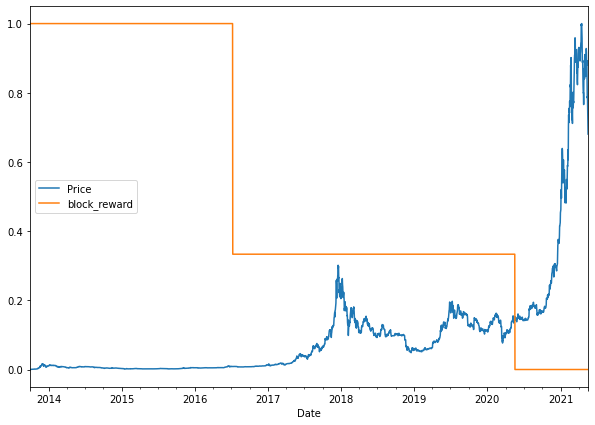

In [89]:
# Plotting block reward vs price over time
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(
    minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
    columns=bitcoin_prices_block.columns,
    index=bitcoin_prices_block.index
)
scaled_price_block_df.plot(figsize=(10, 7))

### Creating windowed multi-variate dataset with pandas

In [90]:
# Setting up hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [91]:
# Making a copy of Bitcoin dataset
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Adding windowed column
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i + 1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [92]:
# Creating X (windows) and y (horizon)
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head(), y.head()

(            block_reward     Price+1     Price+2     Price+3     Price+4  \
 Date                                                                       
 2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
 2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
 2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
 2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
 2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2013-10-08  108.584831  125.455002  123.654991  
 2013-10-09  118.674660  108.584831  125.455002  
 2013-10-10  121.338661  118.674660  108.584831  
 2013-10-11  120.655327  121.338661  118.674660  
 2013-10-12  121.794998  120.655327  121.338661  ,
 Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.27966

In [93]:
# Making train and test sets, using indexing
split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

### Model 6 - Dense (multivariate time series)

In [94]:
# Making miultivariate tiem series model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compiling the model
model_6.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_6 = model_6.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[create_model_checkpoint(model_name=model_6.name)]
)

Epoch 1/100
 9/18 [==============>...............] - ETA: 0s - loss: 2848.0286 INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 3s 105ms/step - loss: 2099.7927 - val_loss: 2236.8638
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 425.8603INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 85ms/step - loss: 386.1429 - val_loss: 1605.7323
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 279.2342INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 91ms/step - loss: 264.7799 - val_loss: 1269.3788
Epoch 4/100
10/18 [===============>..............] - ETA: 0s - loss: 247.4397INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 95ms/step - loss: 228.4638 - val_loss: 1231.9993
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 231.4154INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 101ms/step - loss: 219.3212 - val_loss: 1199.5696
Epoch 6/100
18/18 [==============================] - 0s 13ms/step - loss: 217.1680 - val_loss: 1206.1488
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 215.6859INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 133ms/step - loss: 214.8657 - val_loss: 1146.0688
Epoch 8/100
18/18 [==============================] - 0s 12ms/step - loss: 203.7583 - val_loss: 1151.0063
Epoch 9/100
11/18 [=================>............] - ETA: 0s - loss: 195.1973INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 102ms/step - loss: 198.3214 - val_loss: 1140.5519
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 188.0862INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 101ms/step - loss: 194.3088 - val_loss: 1086.1311
Epoch 11/100
10/18 [===============>..............] - ETA: 0s - loss: 191.1190INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 90ms/step - loss: 189.4281 - val_loss: 1038.9829
Epoch 12/100
18/18 [==============================] - 0s 18ms/step - loss: 185.2902 - val_loss: 1086.5350
Epoch 13/100
 9/18 [==============>...............] - ETA: 0s - loss: 178.9647INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 96ms/step - loss: 179.4962 - val_loss: 1020.5618
Epoch 14/100
13/18 [====================>.........] - ETA: 0s - loss: 172.2669INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 91ms/step - loss: 173.6480 - val_loss: 970.8685
Epoch 15/100
18/18 [==============================] - 0s 12ms/step - loss: 172.3188 - val_loss: 1010.1102
Epoch 16/100
11/18 [=================>............] - ETA: 0s - loss: 168.3329INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 98ms/step - loss: 166.2156 - val_loss: 911.6099
Epoch 17/100
18/18 [==============================] - 0s 9ms/step - loss: 160.2011 - val_loss: 919.9204
Epoch 18/100
18/18 [==============================] - 0s 12ms/step - loss: 155.9961 - val_loss: 932.9349
Epoch 19/100
13/18 [====================>.........] - ETA: 0s - loss: 156.9882INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 92ms/step - loss: 151.9832 - val_loss: 832.7474
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 151.2543INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 128ms/step - loss: 148.8065 - val_loss: 809.5186
Epoch 21/100
10/18 [===============>..............] - ETA: 0s - loss: 154.6238INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 108ms/step - loss: 145.7016 - val_loss: 779.7197
Epoch 22/100
11/18 [=================>............] - ETA: 0s - loss: 152.4071INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 90ms/step - loss: 141.4644 - val_loss: 760.1921
Epoch 23/100
 9/18 [==============>...............] - ETA: 0s - loss: 138.5073INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 93ms/step - loss: 136.1311 - val_loss: 745.1630
Epoch 24/100
14/18 [======================>.......] - ETA: 0s - loss: 134.4038INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 84ms/step - loss: 133.6126 - val_loss: 725.7317
Epoch 25/100
10/18 [===============>..............] - ETA: 0s - loss: 138.0040INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 92ms/step - loss: 130.0451 - val_loss: 712.0466
Epoch 26/100
12/18 [===================>..........] - ETA: 0s - loss: 130.7391INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 88ms/step - loss: 130.4211 - val_loss: 701.5621
Epoch 27/100
 9/18 [==============>...............] - ETA: 0s - loss: 131.5886INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 95ms/step - loss: 127.3518 - val_loss: 684.8080
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 123.7045INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 100ms/step - loss: 123.9828 - val_loss: 673.3837
Epoch 29/100
18/18 [==============================] - 0s 11ms/step - loss: 122.5345 - val_loss: 679.8759
Epoch 30/100
18/18 [==============================] - 0s 10ms/step - loss: 127.9026 - val_loss: 819.9410
Epoch 31/100
18/18 [==============================] - 0s 12ms/step - loss: 138.1854 - val_loss: 870.8356
Epoch 32/100
10/18 [===============>..............] - ETA: 0s - loss: 137.0468INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 93ms/step - loss: 133.9998 - val_loss: 671.9219
Epoch 33/100
12/18 [===================>..........] - ETA: 0s - loss: 123.8080INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 128ms/step - loss: 122.6393 - val_loss: 659.1076
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 123.0439INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 101ms/step - loss: 119.1719 - val_loss: 629.9169
Epoch 35/100
12/18 [===================>..........] - ETA: 0s - loss: 119.3018INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 86ms/step - loss: 116.3230 - val_loss: 626.0923
Epoch 36/100
18/18 [==============================] - 0s 10ms/step - loss: 123.2964 - val_loss: 689.8666
Epoch 37/100
11/18 [=================>............] - ETA: 0s - loss: 117.3633INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 86ms/step - loss: 119.6888 - val_loss: 621.3253
Epoch 38/100
 8/18 [============>.................] - ETA: 0s - loss: 123.4006INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 91ms/step - loss: 116.7362 - val_loss: 614.2278
Epoch 39/100
10/18 [===============>..............] - ETA: 0s - loss: 119.2162INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 119ms/step - loss: 115.5390 - val_loss: 608.8814
Epoch 40/100
12/18 [===================>..........] - ETA: 0s - loss: 116.1286INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 108ms/step - loss: 114.6789 - val_loss: 605.9465
Epoch 41/100
18/18 [==============================] - 0s 10ms/step - loss: 117.1034 - val_loss: 661.0579
Epoch 42/100
18/18 [==============================] - 0s 12ms/step - loss: 121.9747 - val_loss: 623.9106
Epoch 43/100
10/18 [===============>..............] - ETA: 0s - loss: 105.3915INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 104ms/step - loss: 113.3082 - val_loss: 602.4951
Epoch 44/100
 9/18 [==============>...............] - ETA: 0s - loss: 112.0835INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 98ms/step - loss: 112.6655 - val_loss: 598.5344
Epoch 45/100
18/18 [==============================] - 0s 11ms/step - loss: 113.1379 - val_loss: 603.0631
Epoch 46/100
 7/18 [==========>...................] - ETA: 0s - loss: 106.9144INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 96ms/step - loss: 113.0096 - val_loss: 597.3164
Epoch 47/100
18/18 [==============================] - 0s 11ms/step - loss: 113.1863 - val_loss: 649.8302
Epoch 48/100
18/18 [==============================] - 0s 11ms/step - loss: 111.9756 - val_loss: 614.2849
Epoch 49/100
12/18 [===================>..........] - ETA: 0s - loss: 120.8530INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 83ms/step - loss: 114.6557 - val_loss: 596.1214
Epoch 50/100
13/18 [====================>.........] - ETA: 0s - loss: 112.3264INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 97ms/step - loss: 115.8007 - val_loss: 591.4818
Epoch 51/100
18/18 [==============================] - 0s 14ms/step - loss: 111.6293 - val_loss: 600.2963
Epoch 52/100
18/18 [==============================] - 0s 12ms/step - loss: 113.9542 - val_loss: 638.8628
Epoch 53/100
11/18 [=================>............] - ETA: 0s - loss: 118.6721INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 89ms/step - loss: 120.1904 - val_loss: 583.8796
Epoch 54/100
18/18 [==============================] - 0s 12ms/step - loss: 118.4105 - val_loss: 644.7717
Epoch 55/100
18/18 [==============================] - 0s 12ms/step - loss: 112.8257 - val_loss: 586.2400
Epoch 56/100
18/18 [==============================] - 0s 12ms/step - loss: 112.1405 - val_loss: 827.2466
Epoch 57/100
18/18 [==============================] - 0s 12ms/step - loss: 133.1378 - val_loss: 710.5167
Epoch 58/100
18/18 [==============================] - 0s 12ms/step - loss: 123.5774 - val_loss: 646.1204
Epoch 59/100
18/18 [==============================] - 0s 12ms/step - loss: 111.3012 - val_loss: 597.3014
Epoch 60/100
18/18 [==============================] - 0s 12ms/step - loss: 112.3702 - val_loss: 600.0342
Epoch 61/100
18/18 [==============================] - 0s 11ms/step - loss: 110.9559 - val_loss: 600.0157
Epoch 62/100
18/18 [==============================] - 0s 13ms/step -

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 107ms/step - loss: 110.7516 - val_loss: 583.7899
Epoch 64/100
18/18 [==============================] - 0s 11ms/step - loss: 111.2622 - val_loss: 632.7646
Epoch 65/100
10/18 [===============>..............] - ETA: 0s - loss: 117.7698INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 110ms/step - loss: 116.5761 - val_loss: 580.7790
Epoch 66/100
18/18 [==============================] - 0s 16ms/step - loss: 114.7756 - val_loss: 596.5105
Epoch 67/100
18/18 [==============================] - 0s 12ms/step - loss: 108.9275 - val_loss: 600.9901
Epoch 68/100
18/18 [==============================] - 0s 12ms/step - loss: 113.0140 - val_loss: 697.8278
Epoch 69/100
18/18 [==============================] - 0s 11ms/step - loss: 126.7888 - val_loss: 738.3174
Epoch 70/100
18/18 [==============================] - 0s 12ms/step - loss: 120.9691 - val_loss: 601.3335
Epoch 71/100
16/18 [=========================>....] - ETA: 0s - loss: 108.9332INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 128ms/step - loss: 111.4380 - val_loss: 580.2859
Epoch 72/100
12/18 [===================>..........] - ETA: 0s - loss: 107.6733INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 108ms/step - loss: 110.0079 - val_loss: 572.4193
Epoch 73/100
18/18 [==============================] - 0s 11ms/step - loss: 109.8998 - val_loss: 594.1599
Epoch 74/100
18/18 [==============================] - 0s 12ms/step - loss: 110.1355 - val_loss: 573.4238
Epoch 75/100
18/18 [==============================] - 0s 12ms/step - loss: 108.5004 - val_loss: 598.9961
Epoch 76/100
 9/18 [==============>...............] - ETA: 0s - loss: 112.6787INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 3s 150ms/step - loss: 109.9594 - val_loss: 571.3864
Epoch 77/100
18/18 [==============================] - ETA: 0s - loss: 108.5914INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 128ms/step - loss: 108.5914 - val_loss: 569.9584
Epoch 78/100
18/18 [==============================] - 0s 15ms/step - loss: 110.9714 - val_loss: 574.4366
Epoch 79/100
18/18 [==============================] - 0s 12ms/step - loss: 109.0065 - val_loss: 607.7411
Epoch 80/100
18/18 [==============================] - 0s 11ms/step - loss: 109.1255 - val_loss: 579.1640
Epoch 81/100
18/18 [==============================] - 0s 11ms/step - loss: 107.7085 - val_loss: 577.7421
Epoch 82/100
18/18 [==============================] - 0s 10ms/step - loss: 113.8236 - val_loss: 575.0449
Epoch 83/100
18/18 [==============================] - 0s 10ms/step - loss: 114.7613 - val_loss: 614.4243
Epoch 84/100
18/18 [==============================] - 0s 10ms/step - loss: 112.8737 - val_loss: 597.8017
Epoch 85/100
12/18 [===================>..........] - ETA: 0s - loss: 105.2570INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 118ms/step - loss: 108.9402 - val_loss: 569.1376
Epoch 86/100
18/18 [==============================] - 0s 11ms/step - loss: 108.0436 - val_loss: 583.7851
Epoch 87/100
12/18 [===================>..........] - ETA: 0s - loss: 109.4527INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 1s 87ms/step - loss: 108.3174 - val_loss: 569.0511
Epoch 88/100
18/18 [==============================] - 0s 14ms/step - loss: 108.5212 - val_loss: 583.7620
Epoch 89/100
18/18 [==============================] - 0s 12ms/step - loss: 108.7705 - val_loss: 576.5714
Epoch 90/100
18/18 [==============================] - 0s 10ms/step - loss: 107.2212 - val_loss: 641.6903
Epoch 91/100
18/18 [==============================] - 0s 12ms/step - loss: 112.7525 - val_loss: 669.7443
Epoch 92/100
18/18 [==============================] - 0s 12ms/step - loss: 110.3406 - val_loss: 605.5231
Epoch 93/100
18/18 [==============================] - 0s 10ms/step - loss: 115.2363 - val_loss: 603.0984
Epoch 94/100
18/18 [==============================] - 0s 11ms/step - loss: 110.6776 - val_loss: 585.3369
Epoch 95/100
18/18 [==============================] - 0s 10ms/step - loss: 107.1137 - val_loss: 569.5852
Epoch 96/100
18/18 [==============================] - 0s 10ms/step -

INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 90ms/step - loss: 108.6357 - val_loss: 565.0036
Epoch 99/100
10/18 [===============>..............] - ETA: 0s - loss: 105.0793INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_dense_multivariate\assets


18/18 [==============================] - 2s 89ms/step - loss: 108.4296 - val_loss: 564.8008
Epoch 100/100
18/18 [==============================] - 0s 17ms/step - loss: 117.7840 - val_loss: 684.2319


In [95]:
# Ecaluating the model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 6ms/step - loss: 684.2319


684.23193359375

In [96]:
# Loading the best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate/")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 1s 6ms/step - loss: 564.8008


564.8008422851562

In [97]:
# Making predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8860.395, 8799.91 , 9012.965, 8774.273, 8785.463, 8741.508,
       8649.233, 8569.615, 8455.605, 8524.736], dtype=float32)>

In [98]:
# Evaluate predictions
model_6_results = evaluate_preds(
    y_true=y_test,
    y_pred=model_6_preds
)
model_6_results

{'mae': 564.80084,
 'mse': 1158373.5,
 'rmse': 1076.2776,
 'mape': 2.5276074,
 'mase': 0.99219865}

### Model 7 - N-BEATS algorithm

In [99]:
# Creating NBeatBlock custom layer
class NBeatBlock(tf.keras.layers.Layer):
    def __init__(
        self,
        input_size: int,
        theta_size: int,
        horizon: int,
        n_neurons: int,
        n_layers: int,
        **kwargs # Will take care of super class arguments
    ):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of 4 fully connected layers, each with RELU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta_layer")

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast


In [100]:
# Setting up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatBlock(
    input_size=WINDOW_SIZE,
    theta_size=WINDOW_SIZE+HORIZON,
    horizon=HORIZON,
    n_neurons=128,
    n_layers=4
)

In [101]:
# Create dummy inputs (have to be the same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [102]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.07150853 -0.2654615  -0.03238538 -0.5762915   0.7957612  -0.52186495
  0.29127413]
Forecast: 0.1551043689250946


### Preparing data for N-BEATS algorithm with tf.data


In [103]:
# Re-instating our constants
HORIZON = 1
WINDOW_SIZE = 7

In [104]:
# Creating N_BEATS data inputs (univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [105]:
# Adding windowed columns with pandas
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [106]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [107]:
# Making our dataset poerformant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)